# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html). 

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


In [ ]:
from keras.datasets import cifar10

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import tensorflow.compat.v2 as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
import umap

In [ ]:
!!pip install keras

['Requirement already satisfied: keras in /Users/rohitgulve/opt/anaconda3/lib/python3.9/site-packages (2.10.0)']

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

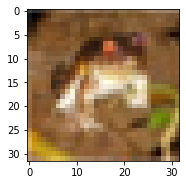

In [ ]:
plt.subplot(121)
img = np.reshape(X_train[0], (32,32,3))
plt.imshow(img)

In [ ]:
## Create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format

In [ ]:
## reshape the image dimensions from three to one

In [ ]:
x_train_flat = X_train.reshape(-1,3072)


In [ ]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]


In [ ]:
df_cifar10 = pd.DataFrame(x_train_flat,columns=feat_cols)

In [ ]:
df_cifar10['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar10.shape))


Size of the dataframe: (50000, 3073)


In [ ]:
df_cifar10.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [ ]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar10.iloc[:,:-1])

In [ ]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal_component_1', 'principal_component_2'])
principal_cifar_Df['y'] = y_train


In [ ]:
principal_cifar_Df.head()

,principal_component_1,principal_component_2,y
0,-1632.259496,695.904884,6
1,211.594763,-242.235529,9
2,1971.200943,-2938.136084,9
3,-2638.693419,2.738206,4
4,-669.541001,-1267.156180,1


In [ ]:
print('Explained variation ratio: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation ratio: [0.2907663  0.11253144]


<Axes: xlabel='principal_component_1', ylabel='principal_component_2'>

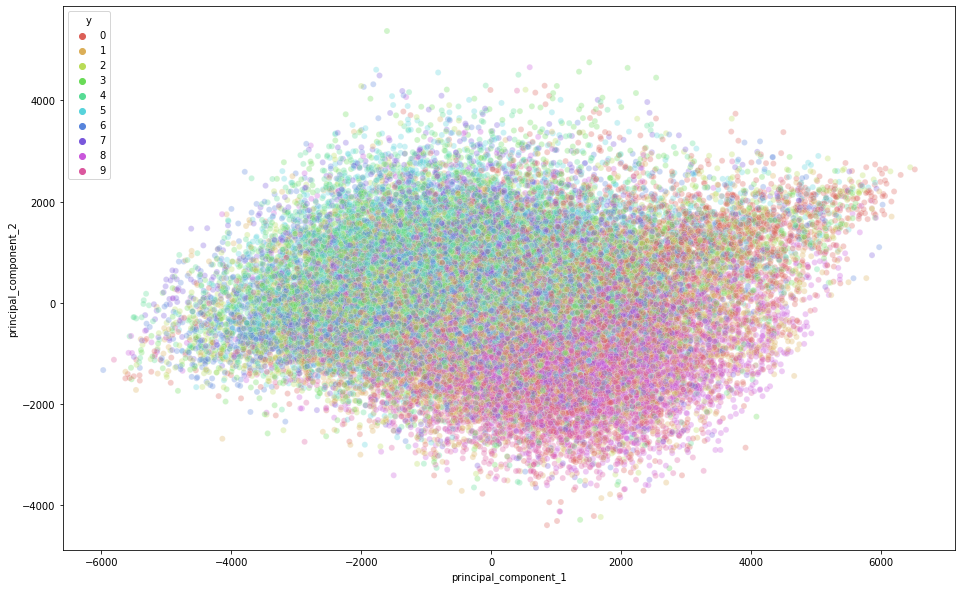

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal_component_1", y="principal_component_2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [2]:
# Defining manifold learning algorithms to compare
manifold_algorithms = [
    ('PCA', PCA(n_components=2)),
    ('Isomap', Isomap(n_components=2)),
    ('LLE', LocallyLinearEmbedding(n_components=2)),
    ('MDS', MDS(n_components=2)),
    ('SE', SpectralEmbedding(n_components=2)),
    ('t-SNE', TSNE(n_components=2, perplexity=30)),
    ('UMAP', umap.UMAP(n_components=2, random_state=42))
]

NameError: name 'PCA' is not defined

In [1]:
# Plot the manifold results
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.ravel()

for i, (name, algo) in enumerate(manifold_algorithms):
    X_manifold = algo.fit_transform(X_train[:1000])
    scatter = axs[i].scatter(X_manifold[:, 0], 
                             X_manifold[:, 1], 
                             c=y_train.argmax(axis=1)[:1000], 
                             s=3, 
                             cmap='plasma', 
                             label=y_train[:1000].argmax(axis=1)[:1000])
    axs[i].set_title(name)
    axs[i].legend(*scatter.legend_elements(), loc="best", title="Classes")

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined